In [1]:
## importing the required libraries for data pre processing and model development  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# reading the train dataset
data=pd.read_csv(r"C:\Users\YASH SHARMA\OneDrive\Desktop\data sets\kaggle\titanic\train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## checking the no. of rows and columns of the data
data.shape

(891, 12)

In [5]:
## getting the general information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# checking the no. of missing values in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
## checking the no. of duplicate values
data.duplicated().sum()

0

In [8]:
# droping the unnecessary columns
data.drop(columns=["PassengerId","Ticket","Name"],inplace=True)

In [9]:
## checking the five pointer summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
# dropping the cabin column as it has lot of missing values
data.drop(columns=["Cabin"],inplace=True)

### Observations:
- there are 891 records and 12 columns in the dataset
- Age,Cabin and Embarked variable has missing values
- There are no duplicate values in the data

## EDA(Exploratory Data Analysis)

### Univariate Analysis - Categorical Features

In [11]:
## creating a function to analyze the categorical variables
def univariate_cat(data, x):
    missing=data[x].isnull().sum() 
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"}, inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"percentage"}, inplace=True)
    f2["percentage"]=(f2["percentage"]*100).round(2).astype(str)+"%"
    ff=pd.concat([f1, f2], axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f"Value count and %\n", ff)
    plt.figure(figsize=(11,7))
    ax=sns.countplot(data=data, x=x)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    
    plt.show()

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[0, 1]
Value count and %
    Count percentage
0    549     61.62%
1    342     38.38%


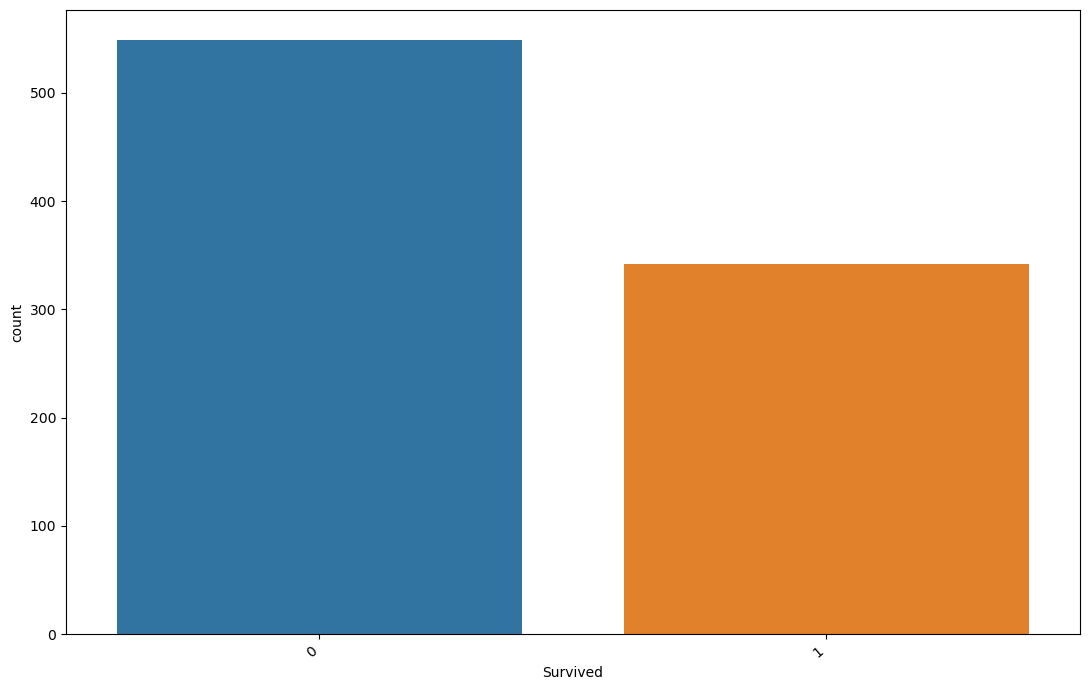

In [12]:
univariate_cat(data,"Survived")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
[3, 1, 2]
Value count and %
    Count percentage
3    491     55.11%
1    216     24.24%
2    184     20.65%


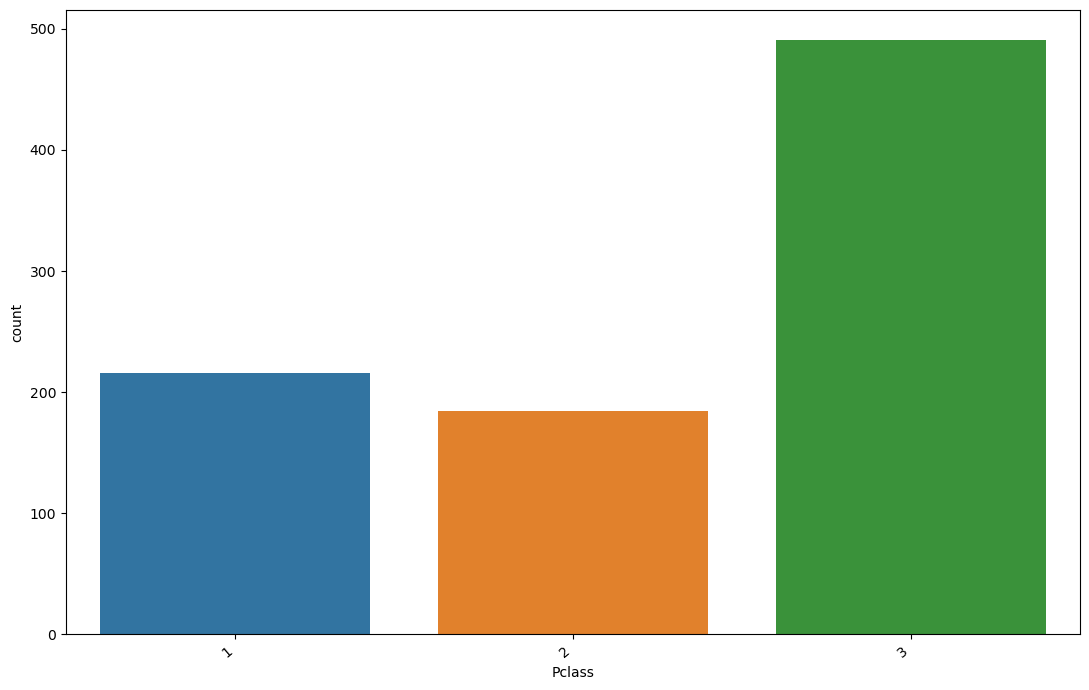

In [13]:
univariate_cat(data,"Pclass")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['male', 'female']
Value count and %
         Count percentage
male      577     64.76%
female    314     35.24%


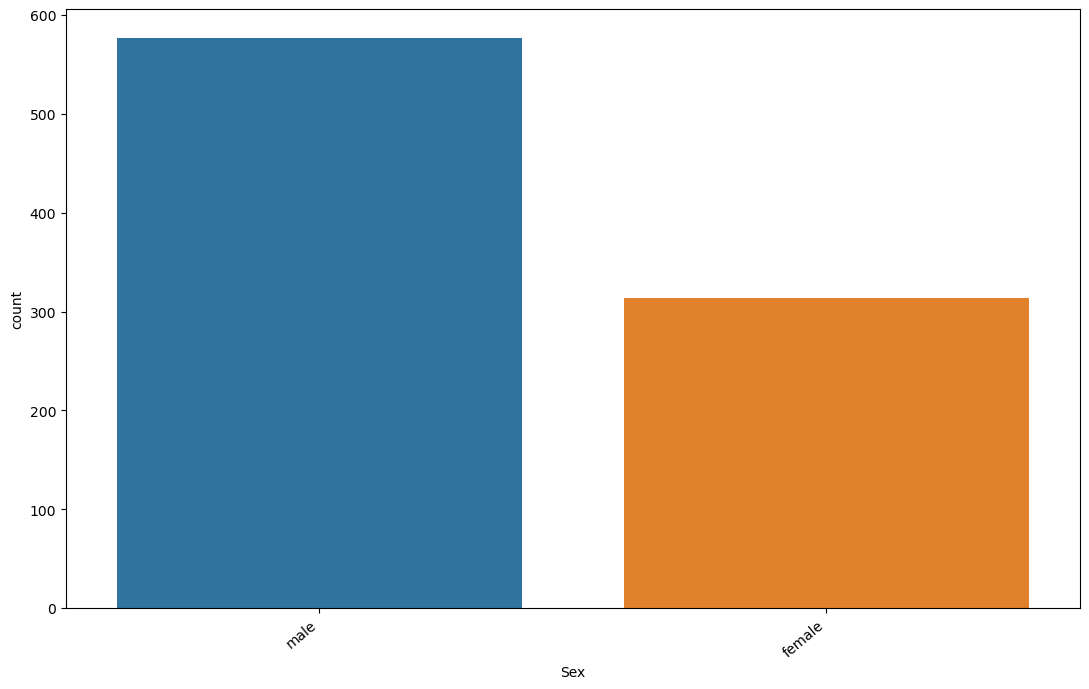

In [14]:
univariate_cat(data,"Sex")

Total missing values : 0

Total count of unique categories: 7

Unique categories :
[1, 0, 3, 4, 2, 5, 8]
Value count and %
    Count percentage
0    608     68.24%
1    209     23.46%
2     28      3.14%
4     18      2.02%
3     16       1.8%
8      7      0.79%
5      5      0.56%


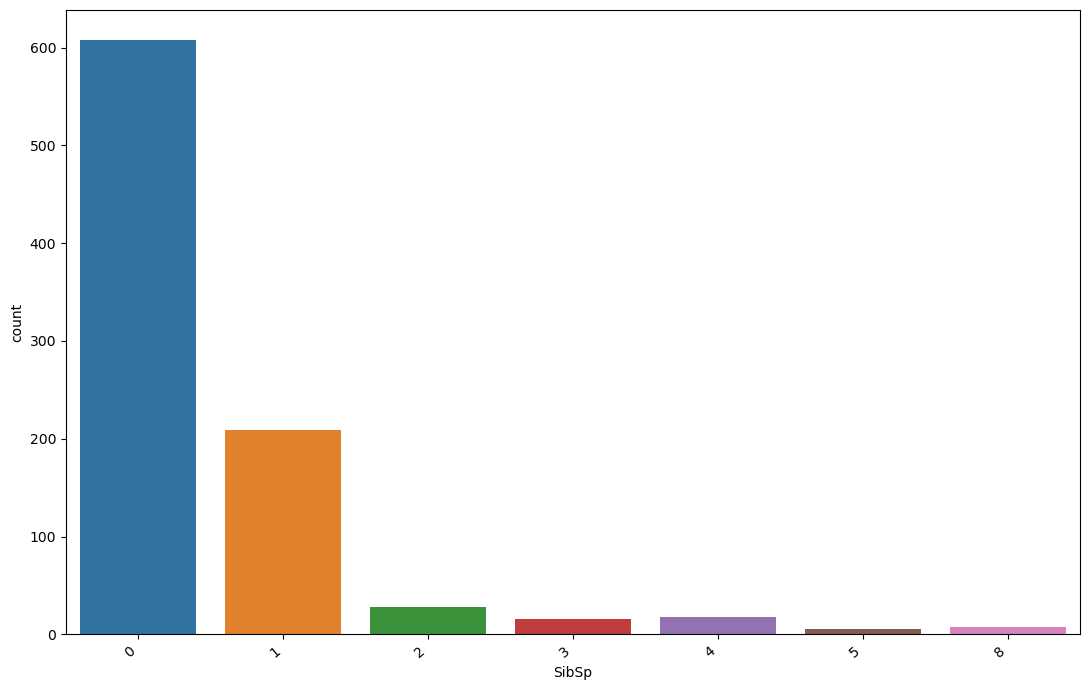

In [15]:
univariate_cat(data,"SibSp")

Total missing values : 0

Total count of unique categories: 7

Unique categories :
[0, 1, 2, 5, 3, 4, 6]
Value count and %
    Count percentage
0    678     76.09%
1    118     13.24%
2     80      8.98%
5      5      0.56%
3      5      0.56%
4      4      0.45%
6      1      0.11%


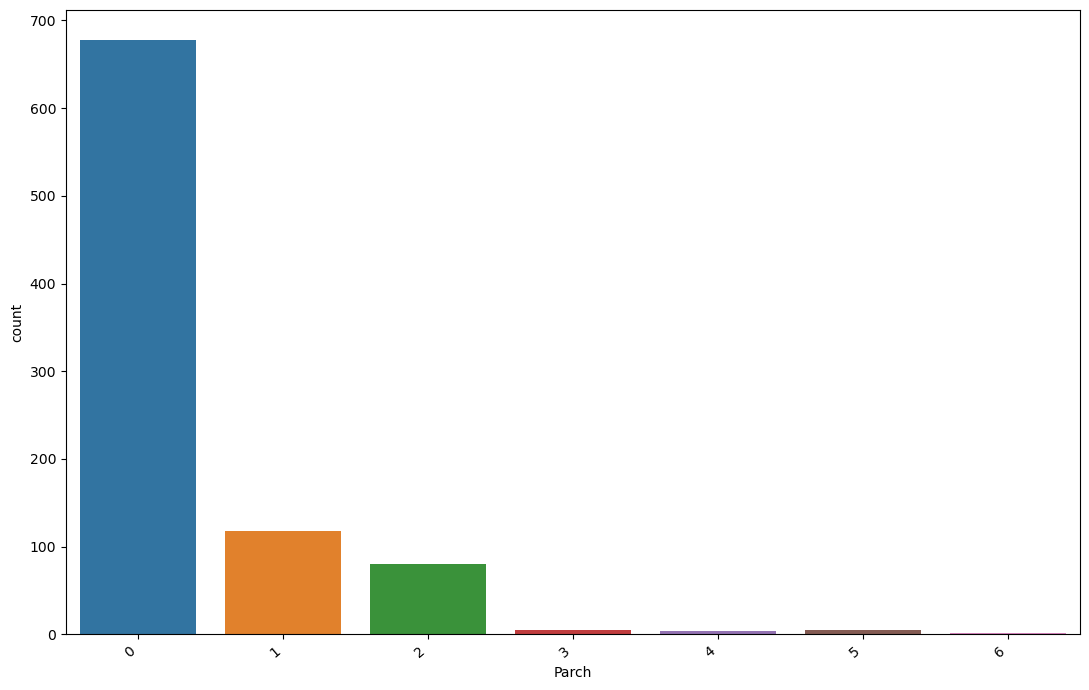

In [16]:
univariate_cat(data,"Parch")

Total missing values : 2

Total count of unique categories: 3

Unique categories :
['S', 'C', 'Q', nan]
Value count and %
      Count percentage
S      644     72.44%
C      168      18.9%
Q       77      8.66%
NaN      2        NaN


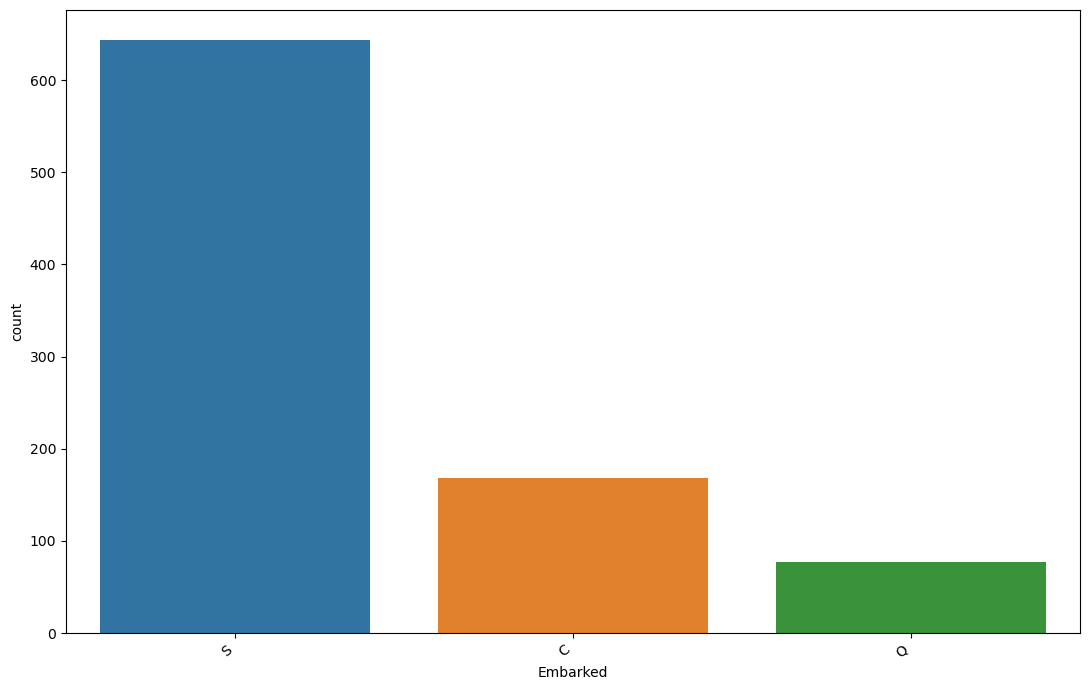

In [17]:
univariate_cat(data,"Embarked")

### Univariate Analysis - Numerical Features

In [18]:
## creating a function to analyze the numerical variables
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

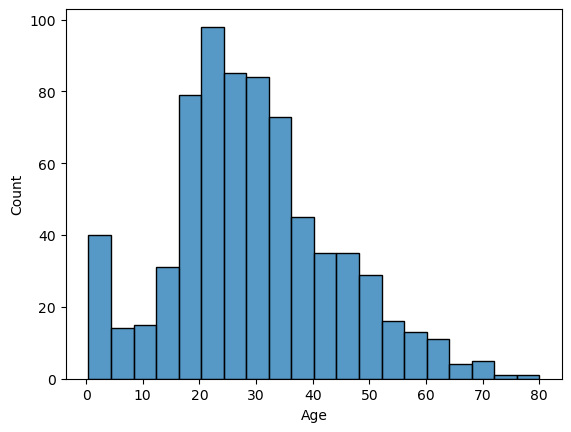

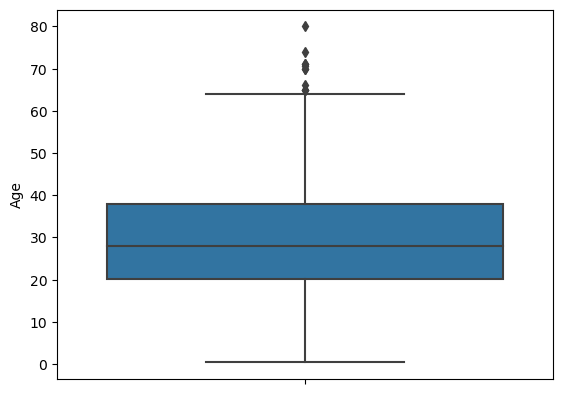

{'missing': 177,
 'min': 0.42,
 'max': 80.0,
 'mean': 29.7,
 'var': 211.02,
 'std': 14.53,
 'range': 79.58,
 'q1': 20.12,
 'q2': 28.0,
 'q3': 38.0,
 'skewness': 0.39,
 'kurtosis': 0.18}

In [19]:
univariate_num(data,"Age")

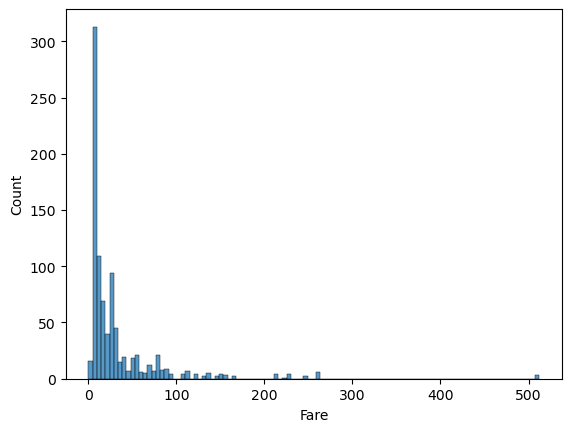

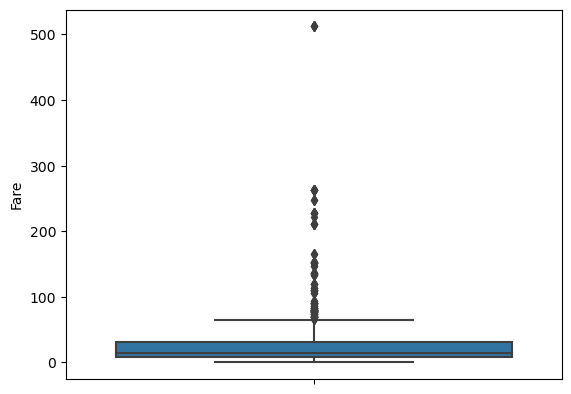

{'missing': 0,
 'min': 0.0,
 'max': 512.33,
 'mean': 32.2,
 'var': 2469.44,
 'std': 49.69,
 'range': 512.33,
 'q1': 7.91,
 'q2': 14.45,
 'q3': 31.0,
 'skewness': 4.79,
 'kurtosis': 33.4}

In [20]:
univariate_num(data,"Fare")

### Bivariate Analysis

In [21]:
pd.crosstab(data["Pclass"],data["Survived"],normalize="columns")

Survived,0,1
Pclass,,
1,0.145719,0.397661
2,0.176685,0.254386
3,0.677596,0.347953


In [22]:
pd.crosstab(data["Sex"],data["Survived"],normalize="columns")

Survived,0,1
Sex,,
female,0.147541,0.681287
male,0.852459,0.318713


In [23]:
data.groupby(["Survived"]).agg({"Fare":["min","max","std","mean","median","std","var"]})

Fare                                                               
          min       max        std       mean median        std          var
Survived                                                                    
0         0.0  263.0000  31.388207  22.117887   10.5  31.388207   985.219509
1         0.0  512.3292  66.596998  48.395408   26.0  66.596998  4435.160158

In [24]:
data.groupby(["Survived"]).agg({"Age":["min","max","std","mean","median","std","var"]})

Age                                                          
           min   max        std       mean median        std         var
Survived                                                                
0         1.00  74.0  14.172110  30.626179   28.0  14.172110  200.848698
1         0.42  80.0  14.950952  28.343690   28.0  14.950952  223.530965

<Axes: xlabel='Age', ylabel='Fare'>

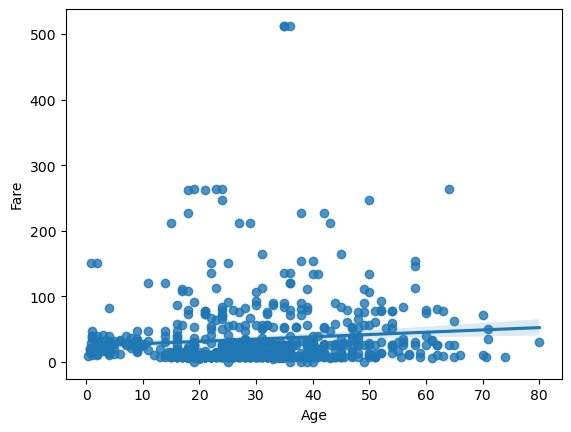

In [25]:
sns.regplot(data=data,x=data["Age"],y=data["Fare"])

In [26]:
data[["Age","Fare"]].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


C:\Users\YASH SHARMA\AppData\Local\Temp\ipykernel_20524\4165046671.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr=data.corr()


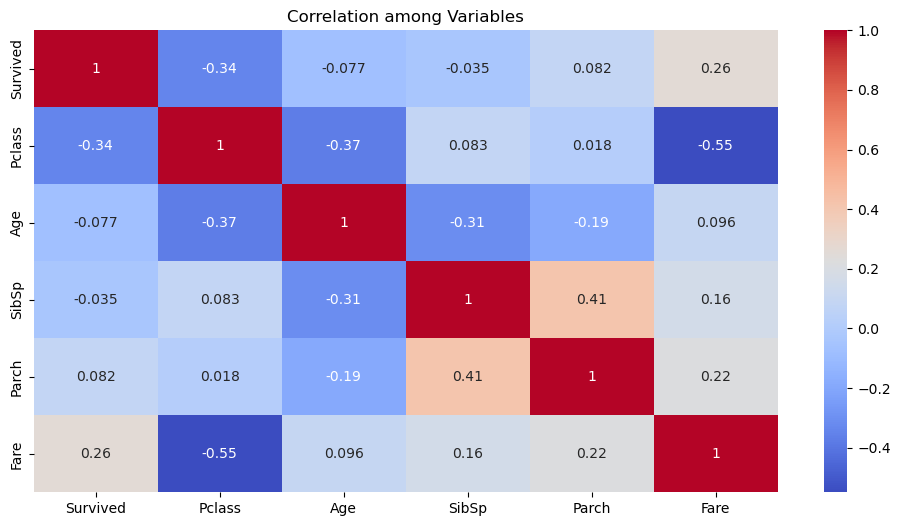

In [27]:
## visualizing the correlation between the variables
plt.figure(figsize=(12,6))
cr=data.corr()
sns.heatmap(cr,annot=True,cmap="coolwarm")
plt.title("Correlation among Variables")
plt.show()

### Observations:
- About 38% of the people has survived 
- Age and Fair columns contains Outliers
- Of all the people survived, almost 70% are females.
- Avg. fare price of the people who survived is more than twice the fare price of the people who did not survived
- No variables have high correlation among them

## Missing Value Treatment

In [28]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [29]:
# replacing median age inplace of missing values in the age column
data["Age"].fillna(data["Age"].median(),inplace=True)

In [30]:
data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [31]:
# replacing missing values in Embarked with mode value
data["Embarked"].fillna("S",inplace=True)

## Outlier Treatment 

In [32]:
data["Fare"]=data["Fare"].clip(upper=data["Fare"].quantile(.99))
data["Fare"]=data["Fare"].clip(lower=data["Fare"].quantile(.01))

In [33]:
data["Age"]=data["Age"].clip(upper=data["Age"].quantile(.99))
data["Age"]=data["Age"].clip(lower=data["Age"].quantile(.01))

## Creating Dummies to convert categorical features into numerical features

In [34]:
data1=pd.get_dummies(data,drop_first=True)

In [35]:
data1.shape

(891, 9)

In [36]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Separating the Dependent and Independent Variables

In [37]:
y=data1["Survived"]
x=data1.drop(columns=["Survived"])

## Model Development - Random Forest

In [38]:
## performing hyperparameter tuning by using randomizedsearchcv for finding the best fit model 

params_rf={"criterion":["gini","entropy"],
          "max_depth":[9,11,13,15,17,20],
          "min_samples_split":[10,20,50,100,200,300],
          "min_samples_leaf":[2,5,7,20,10],
          "n_estimators":[50,100,150,200,300],
          "bootstrap":[True],
          "max_features":["sqrt","log2"],
          "max_samples":[.6,.7,.75,.8,.9]}

rSearch_rf=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=params_rf,cv=5,n_jobs=2)
rSearch_rf.fit(x,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [9, 11, 13, 15, 17, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.6, 0.7, 0.75, 0.8,
                                                        0.9],
                                        'min_samples_leaf': [2, 5, 7, 20, 10],
                                        'min_samples_split': [10, 20, 50, 100,
                                                              200, 300],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300]})

In [39]:
## checking the best values for the hyperparameters
rSearch_rf.best_estimator_

RandomForestClassifier(max_depth=20, max_samples=0.9, min_samples_leaf=2,
                       min_samples_split=20, n_estimators=200)

In [40]:
## creating a random forest model on the training data using the best values of the hyperparameters
rf=RandomForestClassifier(max_depth=20, max_samples=0.9, min_samples_leaf=2,
                       min_samples_split=20, n_estimators=200)
rf.fit(x,y)

RandomForestClassifier(max_depth=20, max_samples=0.9, min_samples_leaf=2,
                       min_samples_split=20, n_estimators=200)

In [41]:
## checking the accuracy of the model on the training dataset
print("Train Accuracy:",rf.score(x,y))

Train Accuracy: 0.8709315375982043


In [42]:
## making the prediction on the train data using the random forest model
pred_train=rf.predict(x)

In [43]:
## classification report on train data 
print(metrics.classification_report(y,pred_train))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       549
           1       0.90      0.75      0.82       342

    accuracy                           0.87       891
   macro avg       0.88      0.85      0.86       891
weighted avg       0.87      0.87      0.87       891



In [44]:
## loading the test data
test_data=pd.read_csv(r"C:\Users\YASH SHARMA\OneDrive\Desktop\data sets\kaggle\titanic\test.csv")

In [45]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Pre processing the test dataset 

In [46]:
test_data1=test_data.drop(columns=["PassengerId","Name","Cabin","Ticket"])

In [47]:
test_data1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [48]:
# replacing the missing values with median values 
test_data1["Age"].fillna(test_data1["Age"].median(),inplace=True)
test_data1["Fare"].fillna(test_data1["Fare"].median(),inplace=True)

### Creating Dummies to convert categorical features into numerical features

In [49]:
test_data1=pd.get_dummies(test_data1,drop_first=True)

## Predicting on the test dataset using the model

In [50]:
pred_test=rf.predict(test_data1)

In [51]:
pred_test=pd.Series(pred_test)

In [52]:
solution=pd.concat([test_data["PassengerId"],pred_test],axis=1)
solution.rename(columns={0:"Survived"},inplace=True)

In [53]:
solution

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [54]:
solution.to_csv(r"C:\Users\YASH SHARMA\OneDrive\Desktop\data sets\kaggle\titanic\solution.csv",index=False)

## Conclusions:
- firstly we analyzed the data by checking for the basic information like duplicates and missing values
- performed Exploratory Data Analysis(EDA) to find meaningful observations from the data
- I did missing value and outlier treatment
- Also converted the non-numerical columns into numerical columns by creating dummies
- Checked the correlation between variables      
- for model development I have used Random Forest
- I have used RandomizedSearchCV for hyperparameter tuning
- model has an accuracy of 87% on the train dataset
- And finally prediction was made on the test dataset using the model

if you have any queries,contact me at - 16102002yashsharma@gmail.com

Thank You